In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model, load_model

Using TensorFlow backend.


In [3]:
from castor import director

In [4]:
%matplotlib inline
import warnings as war
war.simplefilter("ignore")
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 9)
plt.rcParams["font.family"] = "DejaVu Sans"
plt.rcParams["image.cmap"] = "Spectral"

In [5]:
NAME = "lamost"
DATA = "lamost"

In [6]:
loss, acc, val_loss, val_acc = np.loadtxt(NAME+".out", unpack=True)

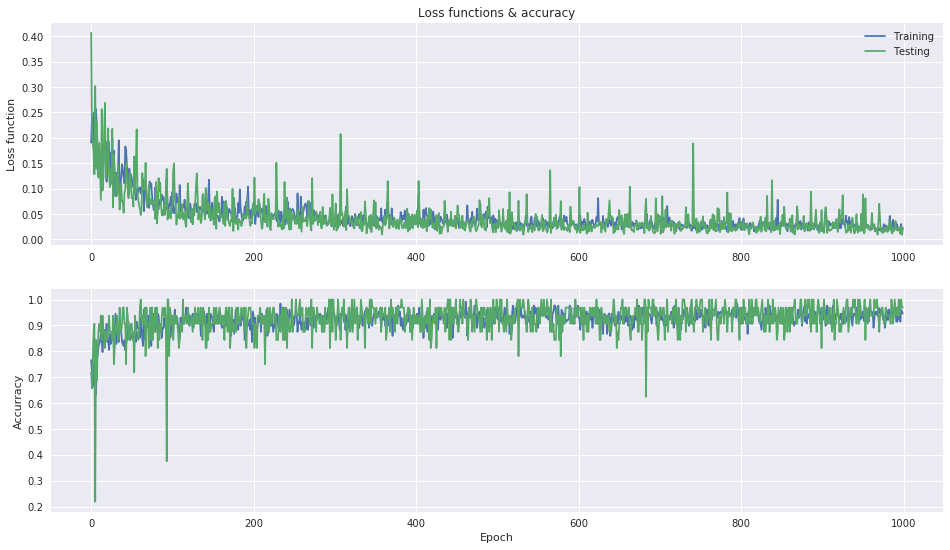

In [7]:
plt.subplot(2, 1, 1)
plt.title("Loss functions & accuracy")
plt.ylabel("Loss function")
plt.plot(loss, label="Training")
plt.plot(val_loss, label="Testing")
plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel("Epoch")
plt.ylabel("Accurracy")
plt.plot(acc, label="Training")
plt.plot(val_acc, label="Testing")
#plt.legend(); plt.grid(True)

In [8]:
MODEL = load_model(NAME+".hdf5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [9]:
for X, Y in director(DATA, DATA):
    if np.random.randint(101) == 8:
        break

In [10]:
#plt.figure(figsize=(16,16))
#plt.xticks([]); plt.yticks([])
#plt.imshow(X[0,:,:,0])
#plt.grid(False)

In [11]:
def feature(layer):
    mydel = Model(MODEL.input, MODEL.get_layer(layer).output)
    myfet = mydel.predict(X)
    _, _, _, x = myfet.shape
    y = x // 4
    plt.figure(figsize=(16,16/5*y))
    for i in range(y):
        for j in range(4):
            n = i*4+j
            plt.subplot(y, 4, 1+n)
            plt.xticks([]); plt.yticks([])
            plt.imshow(myfet[0,:,:,n])
            plt.grid(False)
            plt.colorbar()

In [12]:
#feature("Conv1")

In [13]:
#feature("Max2")

In [14]:
def filters(N):
    W = MODEL.get_weights()
    x, y, s, v = W[N].shape
    plt.figure(figsize=(16,16/s*v))
    for i in range(v):
        for j in range(s):
            n = i*s+j
            plt.subplot(v, s, 1+n)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(W[N][:,:,j,i],
                       interpolation="quadric")
    plt.grid(False)

In [15]:
#filters(2)

In [16]:
%%time
OUTPUT = np.load(DATA+".npy")
PREDIC = MODEL.predict_generator(director(DATA, DATA), steps=len(OUTPUT))
ERRORF = np.sqrt(np.sum((PREDIC-OUTPUT)**2,axis=1))

CPU times: user 8min 4s, sys: 31.6 s, total: 8min 35s
Wall time: 3min 35s


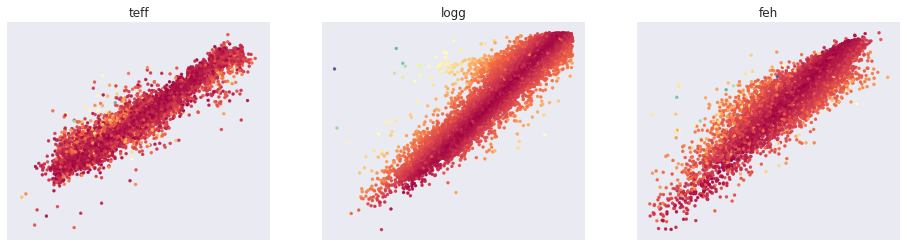

In [17]:
tip = ["teff", "logg", "feh"] #! tip @Lamost && key @Pollux
plt.figure(figsize=(16,4))
for i, name in enumerate(tip):
    plt.subplot(131+i)
    plt.title(name)
    plt.xticks([]); plt.yticks([])
    plt.scatter(OUTPUT[:,i], PREDIC[:,i], c=ERRORF, s=9)

([], <a list of 0 Text yticklabel objects>)

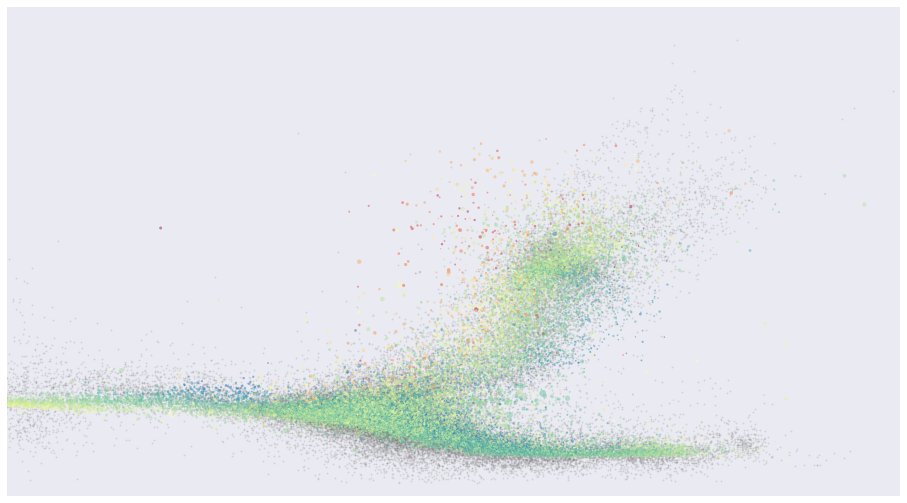

In [18]:
#plt.title("Colored uncertainty of functionality")
#plt.xlabel("Logaritmus of $T_\mathrm{eff}$")
#plt.ylabel("Logaritmus of $g$")
plt.scatter(OUTPUT[:,0], OUTPUT[:,1], c="gray", s=2, alpha=0.2)
plt.scatter(PREDIC[:,0], PREDIC[:,1], c=PREDIC[:,2], s=10*ERRORF, alpha=0.5)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlim([3.95, 3.52])
plt.ylim([5.15,-0.42])
plt.xticks([])
plt.yticks([])
#plt.colorbar();